In [1]:
from utility import *

for l in [4, 8, 12, 16, 20]:
    print(f'############## {l} ###############')
    for cov in ['cov2', 'cov1', 'cov3over4', 'cov1over2']:
        precision = precisionOneBatch(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/calledIBD/{cov}/ch3_{l}cm/ibd.summary.csv', \
            f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim2/simGeno/ch3_{l}cm/ibd_info.csv', l-0.5, l+0.5)
        power = powerOneBatch(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/calledIBD/{cov}/ch3_{l}cm/ibd.summary.csv', \
            f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim2/simGeno/ch3_{l}cm/ibd_info.csv')
        print(f'precision for {cov}: {precision}')
        print(f'power for {cov}: {power}')

############## 4 ###############
precision for cov2: 0.8376846472522456
power for cov2: 0.9723500028762019
precision for cov1: 0.5537872671779726
power for cov1: 0.9727601995559308
precision for cov3over4: 0.4505767170060634
power for cov3over4: 0.9759829334735639
precision for cov1over2: 0.25209964807843055
power for cov1over2: 0.9764408282667663
############## 8 ###############
precision for cov2: 0.9742379723892076
power for cov2: 0.9856136750268277
precision for cov1: 0.9528692107330552
power for cov1: 0.9852369014108687
precision for cov3over4: 0.9346468446631581
power for cov3over4: 0.9852141584225013
precision for cov1over2: 0.8684696736710392
power for cov1over2: 0.9873546865710492
############## 12 ###############
precision for cov2: 0.9817842918888243
power for cov2: 0.9911887462651817
precision for cov1: 0.9803035921138953
power for cov1: 0.9909949154037011
precision for cov3over4: 0.9806298731664399
power for cov3over4: 0.9908891599036211
precision for cov1over2: 0.97503054

Saved to ./fig/cov2.png


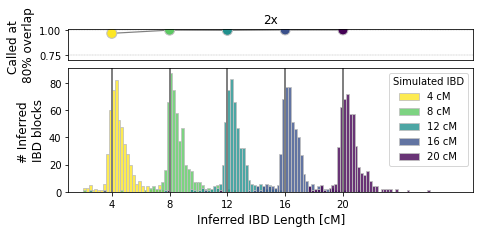

[0.964, 0.996, 0.994, 0.998, 0.998]
Saved to ./fig/cov1.png


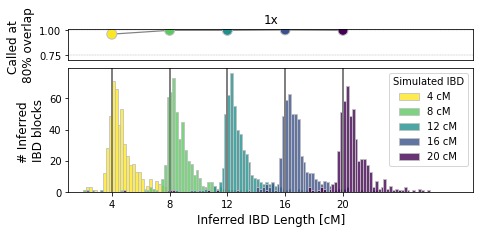

[0.956, 0.994, 0.994, 0.998, 0.994]
Saved to ./fig/cov3over4.png


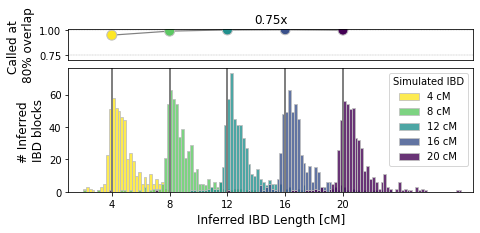

[0.946, 0.986, 0.998, 1.0, 0.996]
Saved to ./fig/cov1over2.png


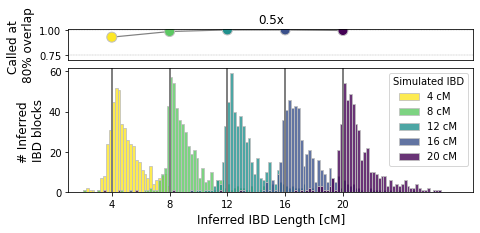

[0.926, 0.982, 0.998, 0.998, 0.992]
Saved to ./fig/cov1over4.png


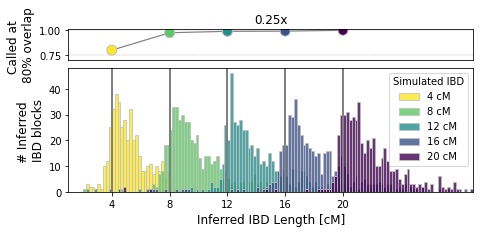

[0.796, 0.97, 0.984, 0.986, 0.994]
Saved to ./fig/cov1over10.png


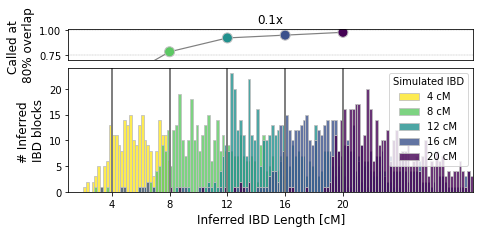

[0.452, 0.78, 0.918, 0.946, 0.974]


In [1]:
import pandas as pd
import sys
sys.path.append('/mnt/archgen/users/yilei/tools/hapBLOCK/notebook/simulate/python')
from plot_funcs import plot_power_yilei, plot_fp_distribution
from utility import *

bl_lens = [4, 8, 12, 16, 20]
cov2str = {'cov2':'2x', 'cov1':'1x', 'cov3over4':'0.75x', 'cov1over2':'0.5x', 'cov1over4':'0.25x', 'cov1over10':'0.1x'}

for cov, title in cov2str.items():

    df_fp = pd.read_csv(f'/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/calledIBD/{cov}/ch3_0cm/ibd.summary.csv', sep=',')
    df_called, power = lengthCallAll(bl_lens, cov, '/mnt/archgen/users/yilei/IBDsim/realMosaicSim_1240k/calledIBD', threshold=0.8)
    plot_power_yilei(bl_lens, df_called, power, df_fp=[], title=cov2str[cov], 
           savepath=f"./fig/{cov}.png", figsize=(7.25,3), ylim_pow=[0.7,1.01], hspace=0.1,
           fs_l=10, fs=12, 
           xlim=[1,29])
    print(power)

# some sanity check for the relationship between coverage (on targets) and number of 1240k sites covered

In [1]:
import pandas as pd
import numpy as np

#data = pd.read_csv('/mnt/sequencedb/gendivdata/2_genotypes/allen_ancient_dna_resource/v52/v52.2_1240K_public.anno', sep='\t')
data = pd.read_csv('v54.1_1240K_public.anno', sep='\t')

sample_1240k = data[data['Data source'] == '1240K']
print(f'number of 1240k samples: {len(sample_1240k)}')
sample_SG = data[data['Data source'] == 'Shotgun']
print(f'number of SG samples: {len(sample_SG)}')

number of 1240k samples: 6779
number of SG samples: 5342


/tmp/ipykernel_747200/2778075266.py:5: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('v54.1_1240K_public.anno', sep='\t')


correlation: [[1.         0.75751135]
 [0.75751135 1.        ]]


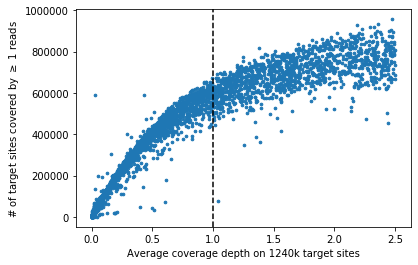

In [2]:
import matplotlib.pyplot as plt
xlabel='1240k coverage (taken from original pulldown where possible)'
ylabel='SNPs hit on autosomal targets (Computed using easystats on 1240k snpset)'

subset = sample_1240k[xlabel] != '..'
sample_1240k = sample_1240k[subset]

coverage1240K = np.array(sample_1240k[xlabel], dtype=np.float32)
num1240Khits = np.array(sample_1240k[ylabel], dtype=np.int32)
print(f'correlation: {np.corrcoef(coverage1240K, num1240Khits)}')
i = coverage1240K <= 2.5
plt.scatter(coverage1240K[i], num1240Khits[i], s=7.0)

plt.xlabel('Average coverage depth on 1240k target sites')
plt.ylabel('# of target sites covered by $\geq$ 1 reads')
plt.axvline(x=1.0, color='black', linestyle='--')
plt.savefig('coverage.1240k.png', dpi=300)
plt.savefig('coverage.1240k.pdf', dpi=300, bbox_inches="tight")

sample_1240k[coverage1240K>8].to_csv('1240k.highcov.anno.tsv', sep='\t')

In [2]:
import pandas as pd

data = pd.read_csv('/mnt/sequencedb/gendivdata/2_genotypes/allen_ancient_dna_resource/v52/v52.2_1240K_public.anno', sep='\t')
data = data[data['Data source'] == '1240K']

iids_highcov_wgs = []
with open('/mnt/archgen/users/yilei/IBDsim/realMosaicSim/iid.list') as f:
    for line in f:
        iid = line.strip()
        iids_highcov_wgs.append(iid)

data = data[data['Master ID'].isin(iids_highcov_wgs)]
data.to_csv('1240k_sample_withHighcovWGS.csv', sep=',')


In [25]:
print(num1240Khits[:100])

[ 590693  590361  590571  110533  144946  983564  487289  189178  158917
  476279   14802    7912   98500  131119   85253  436715  146505  124479
  166176   46053   45439   20076   13967  290291   45376  238124  308943
 1078358  881545  226856  534002  292844  406429  595901   43174  216396
  211381  188830   93708   95751   67380  213964   26520   30457  446927
  569183  813622   31605  110981  824182  284105  835204  649225  619022
  181851  390870   60494  190166  620077  581308  742447  332598  115827
  125754  760685  895907  659984  210049  549359  379212  338749  775366
   91779  814980  795773  735609  696551  827122  800238  813263  621454
  705181  828797  322819  842569  850709  853050  810008  656606  259439
  341023  217992    7017  897878   39670  830976  810752  903978  376502
  868957]
